## Customer Personal Loan Project

## Description
### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.



## Data Description

The data provided contains records of customers finantial records and also their loan status, that is whether they accepted loan or not.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
bank_data = pd.read_csv('Loan_Modelling.csv')
bank_data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


- Data contains 5000 entries and 14 features.

In [22]:
#Dropping the ID feature:
bank_data = bank_data.drop('ID',axis=1)
bank_data.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4221,48,22,83,90028,2,0.4,3,248,0,0,0,1,0
4851,55,31,124,93407,2,0.3,1,0,0,0,0,1,0
1100,42,16,13,91711,1,0.2,1,0,0,0,0,1,0
2084,36,9,44,93907,4,1.0,2,101,0,1,0,1,0
4815,58,32,99,92697,2,1.4,1,0,0,0,0,0,1


In [7]:
bank_data.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [10]:
bank_data.duplicated().sum()

0

In [17]:
invalid_entry = []
for index, years in enumerate(bank_data['Experience']):
    if years < 0:
        invalid_entry.append(index)
    else:
        continue
print('Total number of entries with negative year value for experience is', len(invalid_entry))

Total number of entries with negative year value for experience is 52


- There are 52 entries with negative values for years of experience.

In [23]:
print(invalid_entry)

[89, 226, 315, 451, 524, 536, 540, 576, 583, 597, 649, 670, 686, 793, 889, 909, 1173, 1428, 1522, 1905, 2102, 2430, 2466, 2545, 2618, 2717, 2848, 2876, 2962, 2980, 3076, 3130, 3157, 3279, 3284, 3292, 3394, 3425, 3626, 3796, 3824, 3887, 3946, 4015, 4088, 4116, 4285, 4411, 4481, 4514, 4582, 4957]


In [25]:
for index, years in enumerate(bank_data['Experience']):
    if years < 0:
        bank_data.loc[index, 'Experience'] = -1 * years
    else:
        continue

In [26]:
bank_data.loc[invalid_entry]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,2,125,92835,2,7.20,1,0,0,1,0,0,1


- Experience now positive values.

In [27]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


- Age of customers between 23 and 67 years old.
- Most of the customers earn between 39 and 98 thousand dollars.

## EDA:

In [28]:
# Adding percent or count to plots:
def plot_percent_weight(plot_name,data,feature,show_value=None):
    '''
    plot_name: The name of the variable assigned to the plot.
    data: The dataframe to compute the weight against.
    feature: The feature being plotted against.
    show_value: Determines the weight to show whether only percent or percent and weight (True or False).
    '''
    #Calculating the weights:
    for attribute in plot_name.patches:
        if show_value==True:
            value = '{:.1f}% ({})'.format(100 * attribute.get_height() / len(data[feature]), attribute.get_height())
        elif show_value==False:
            value = '{:.1f}%'.format(100 * attribute.get_height() / len(data[feature]))
            
        #Defining annotation coordinatites:    
        x_cord = attribute.get_x() + attribute.get_width() / 6
        y_cord = attribute.get_height()
        plot_name.annotate(value,(x_cord,y_cord),textcoords='offset points',xytext=(1,2))
    return

In [29]:
# countplot function:
def countplot_func(data,main_data,plot_size,xlabel,plot_title,plot_variable=None,add_count=False):
    '''
    data: The data containing the feature being plotted.
    main_data: The dataframe to compute the feature weight against.
    plot_size: size of the plot.
    xlabel: Name of x-axis.
    plot_title: Title of plot.
    plot_variable: Feature from main_data to be weighted against.
    add_count: Determines whether to add percent or both percent and weight (True or False).
    '''
    plt.figure(figsize=plot_size)
    plot_name = sns.countplot(data=data, x=xlabel)  #Instance of the plot created
    plot_percent_weight(plot_name,main_data,plot_variable,add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.show()
    return

In [30]:
# barplot function:
def barplot_func(data,main_data,plot_size,x,y,xlabel,plot_title,plot_variable,add_count):
    

    plt.figure(figsize=plot_size)
    plot_name = sns.barplot(data=data, x=x, y=y)
    plot_percent_weight(plot_name,main_data,plot_variable,show_value=add_count)
    plt.xlabel(xlabel)
    plt.title(plot_title)
    plt.grid(linestyle='--',linewidth=0.5)
    plt.show()
    return

In [31]:
# catplot function:
def catplot_func(data,x,y,kind,height,aspect,plot_title,xlabel):
    '''
    data: Dataframe being considered.
    x: feature on x-axis.
    y: feature on y_axis.
    kind: Specifies the type of plot (e.g box).
    height,aspect: Specifies the size of plot.
    plot_title: Title of plot'.
    xlabel: Title on x-axis.
    '''
    sns.catplot(data=data, x=x, y=y, kind=kind,height=height, aspect=aspect)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.grid(linestyle='--',linewidth=0.4)
    plt.show()
    return

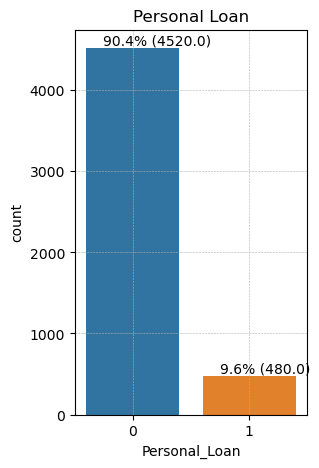

In [43]:
countplot_func(data=bank_data,main_data=bank_data,plot_size=(3,5),xlabel='Personal_Loan',
               plot_title='Personal Loan Distribution',plot_variable='Personal_Loan',add_count=True)

- 90.4% did not take loan while only 9.6% took loan.

<Axes: xlabel='Income', ylabel='Count'>

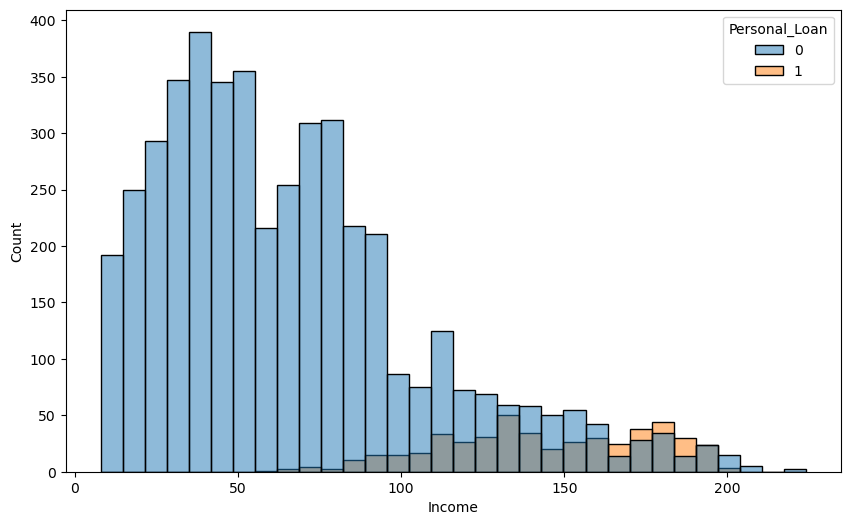

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data=bank_data, x='Income',hue='Personal_Loan')
plt.title('Income Distribution')
plt.show()

- Customers who earn above 60,000 dollars as income took loan.

In [52]:
bank_data.groupby('Personal_Loan')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.0,66.237389,40.578534,8.0,35.0,59.0,84.0,224.0
1,480.0,144.745833,31.584429,60.0,122.0,142.5,172.0,203.0


- Customers with income above $60,000 took loan.
- Most of those who took loan earn between 122 to 172 thousand dollars income.
- Most of those who didn't take loan earn between 35-84 thousand.

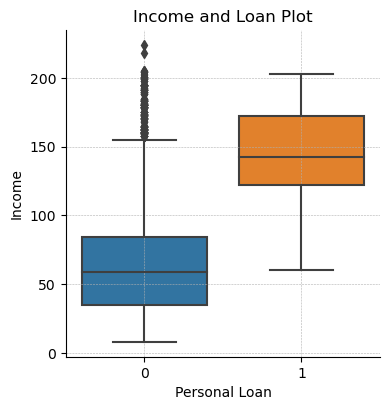

In [51]:
catplot_func(data=bank_data[['Personal_Loan','Income']],x='Personal_Loan',y='Income',kind='box',height=4,aspect=1,
             plot_title='Income and Loan Plot',xlabel='Personal Loan')

- Some customers with much higher income (above $150,000) didn't take loan even though they earned more income than those who did.

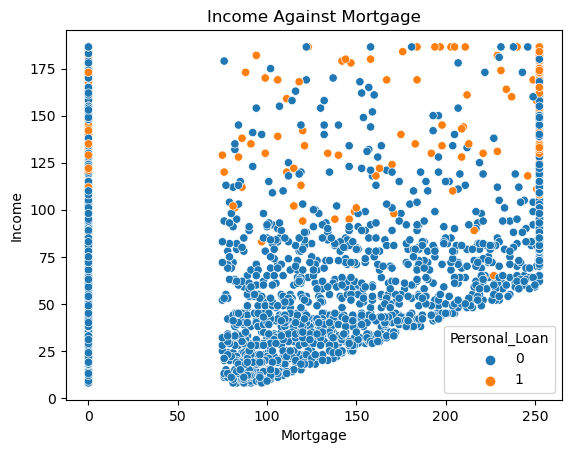

In [277]:
sns.scatterplot(data=bank_data, x='Mortgage', y='Income', hue='Personal_Loan')
plt.title('Income Against Mortgage')
plt.show()

- Most of the customers who took loan earn above $100,000 while most of those who didn't earn lesser.

<Axes: xlabel='Age', ylabel='Experience'>

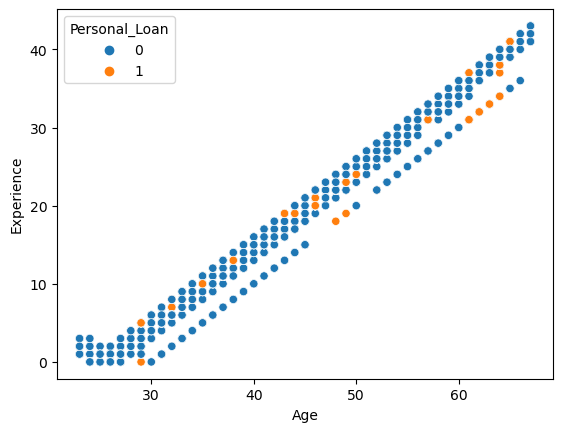

In [65]:
sns.scatterplot(data=bank_data, x='Age', y='Experience', hue='Personal_Loan')
plt.title('Experience Vs Age')
plt.show()

- Experience is positively correlated with age of customers.

In [71]:
bank_data.groupby('Online')['Mortgage'].describe()

,count,mean,std,min,25%,50%,75%,max
Online,,,,,,,,
0,2016.0,57.240575,101.861825,0.0,0.0,0.0,102.0,617.0
1,2984.0,55.997654,101.627690,0.0,0.0,0.0,100.0,635.0


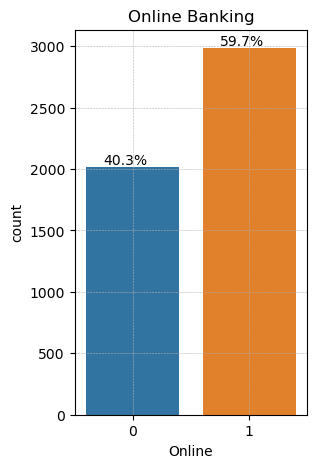

In [68]:
countplot_func(data=bank_data,main_data=bank_data,plot_size=(3,5),xlabel='Online',
               plot_title='Online Banking Distribution',plot_variable='Online',add_count=False)

- More customers (59.7%) use internet banking while 40.3% do not.

In [ ]:
bank_data_raw = bank_data.copy()

## Outlier Treatment:

In [76]:
def treat_outliers_columns(data,feature_list):
    for feature in feature_list:
        Q_1= data[feature].quantile(0.25)
        Q_3 = data[feature].quantile(0.75)
        Iq_range = Q_3 - Q_1
        lower = Q_1 - (1.5 * Iq_range)
        upper = Q_3 + (1.5 * Iq_range)
        new_feature = np.clip(data[feature], lower, upper)
        data[feature] = new_feature
    return data

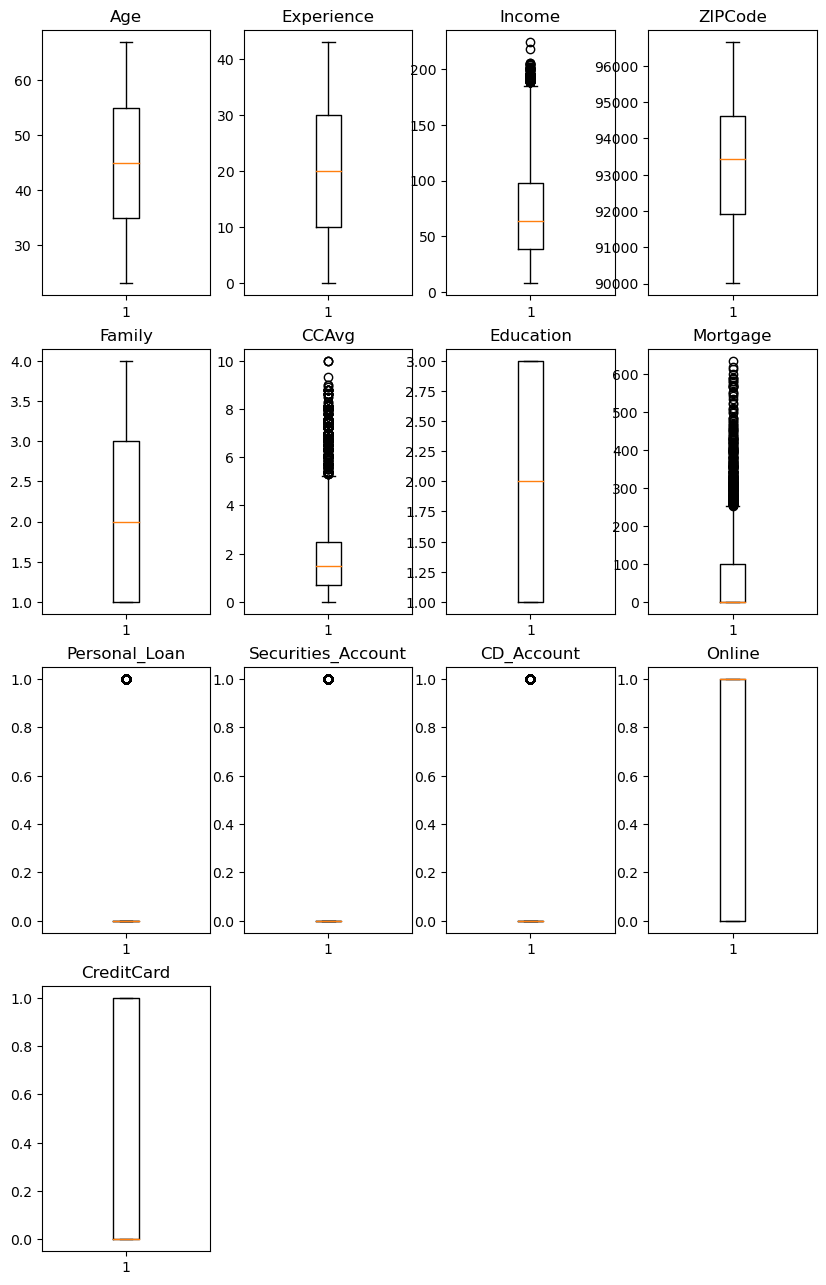

In [82]:
#Identifying the features with outliers:
plt.figure(figsize=(10,20))
for features,entry in zip(bank_data.columns,range(0,len(bank_data.columns))):
    plt.subplot(5,4,entry+1)
    plt.boxplot(bank_data[features])
    plt.title(features)
plt.show()

In [84]:
#Applying the outlier treatment function on the numerical features in the data (excluding the target variable):
bank_data = treat_outliers_columns(bank_data,bank_data.drop(['Personal_Loan','Securities_Account','CD_Account'],
                                                            axis=1).columns)

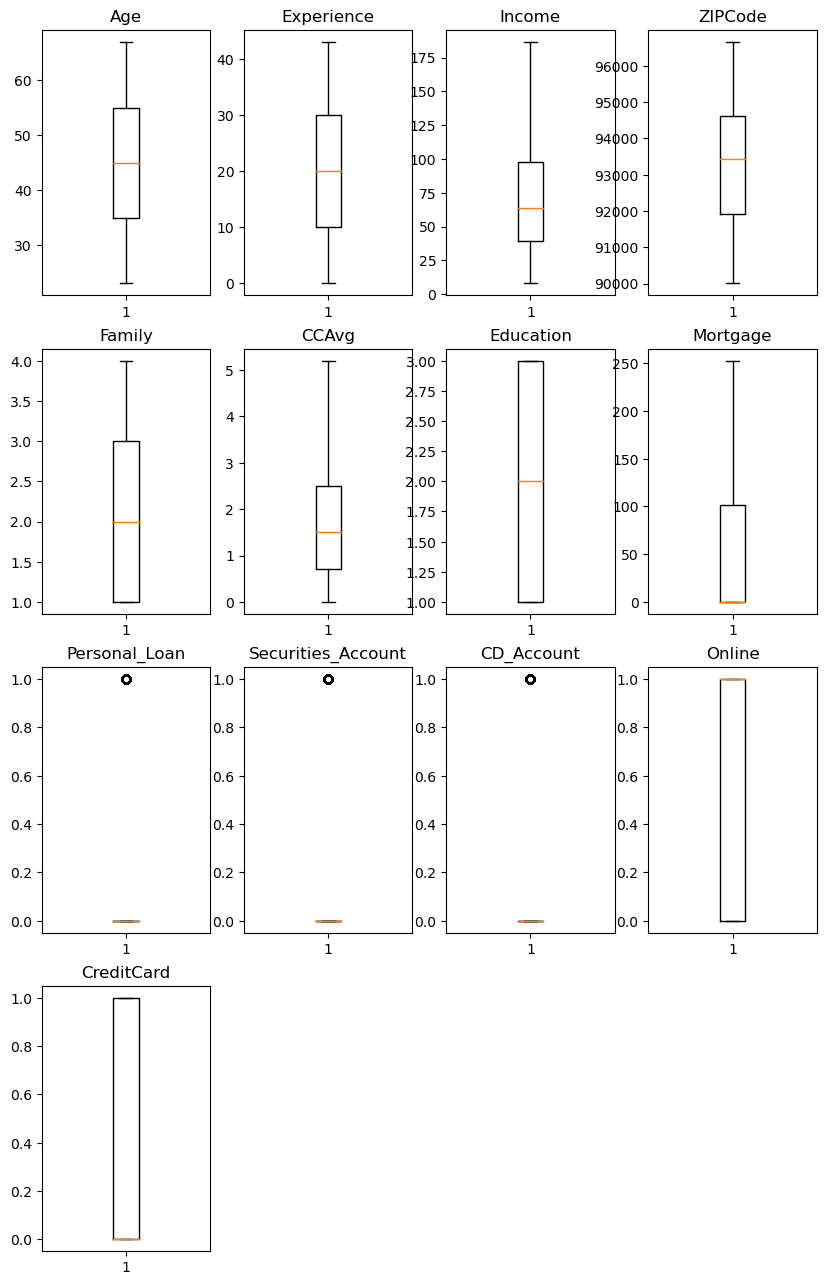

In [85]:
# Sanity Check for outliers:
plt.figure(figsize=(10,20))
for features,entry in zip(bank_data.columns,range(0,len(bank_data.columns))):
    plt.subplot(5,4,entry+1)
    plt.boxplot(bank_data[features])
    plt.title(features)
plt.show()

- Outliers Treated.

### Examining Correlation:

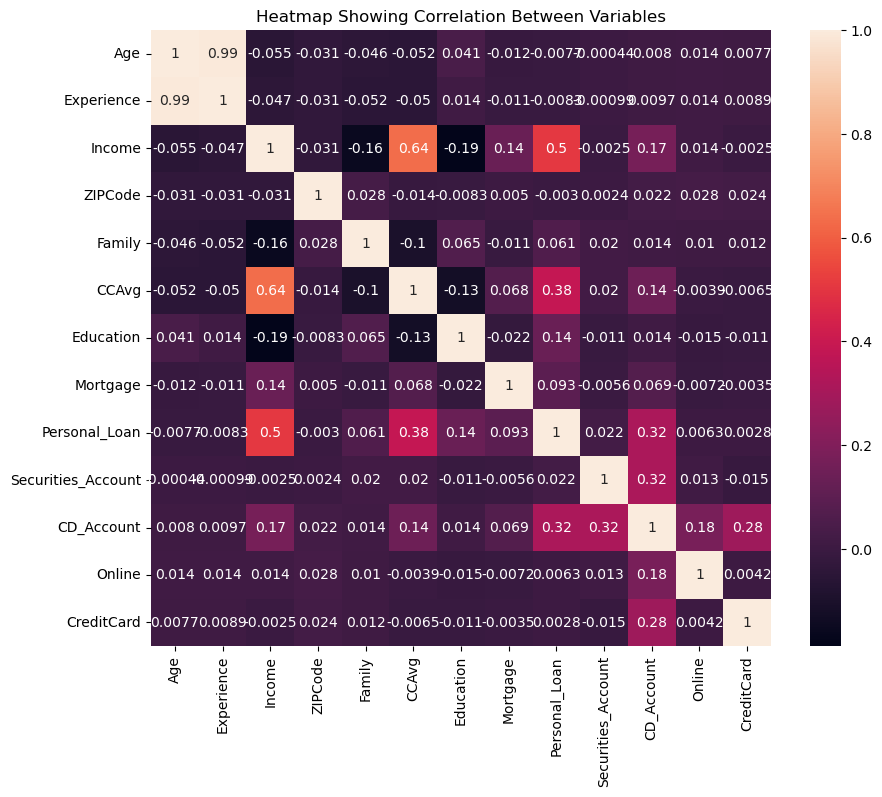

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(data=bank_data.corr(), annot=True, fmt='.2g')
plt.title('Heatmap Showing Correlation Between Variables')
plt.show()

- Experience and age exhibit multi-colinearity (0.98).
- Income, CCAvg and CD_Account had more effect (0.5, 0.38 & 0.32) on the a customer's decision to take loan compared to other variables.

### Machine Learning (Classification) Model
Building Supervised Machine Learning Model to Predict Whether a customer will accept a loan or not.

In [108]:
#Importing the library
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE,RandomOverSampler

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler, Normalizer,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import (precision_score,
                            accuracy_score,
                            recall_score,
                            f1_score)

In [280]:
# Classification and Confusion Matrix Display plot function:
def classification_confusion_matrix(fig,yTest,yTrain,yPrediction_train, yPrediction_test,target_labels):
    print('Classification Report for Training:')
    print(classification_report(yTrain, yPrediction_train))
    print('='*80)
    print('Classification Report for Testing:')
    print(classification_report(yTest, yPrediction_test))
    print('='*80)
    fig, ax = plt.subplots(1,2,figsize=fig)
    ConfusionMatrixDisplay.from_predictions(yTrain,yPrediction_train, display_labels=target_labels,ax=ax[0])
    ConfusionMatrixDisplay.from_predictions(yTest,yPrediction_test, display_labels=target_labels,ax=ax[1])
    ax[0].title.set_text('Training')
    ax[1].title.set_text('Testing')
    plt.show()
    return

In [104]:
# Model building function:
def building_model(model,Xtrain_data,X_data,Ytrain_data):
    model.fit(Xtrain_data,Ytrain_data)
    prediction = model.predict(X_data)
    return prediction

In [105]:
# Performance Evaluation Function:
def performance_evaluation(prediction_test,prediction_train,Ytest_data,Ytrain_data):
    
    #Training:
    prec_train = precision_score(Ytrain_data,prediction_train)
    accu_train = accuracy_score(Ytrain_data,prediction_train)
    rec_train = recall_score(Ytrain_data,prediction_train)
    f1_train = f1_score(Ytrain_data,prediction_train)
    
    #Testing:    
    prec_test = precision_score(Ytest_data,prediction_test)
    accu_test = accuracy_score(Ytest_data,prediction_test)
    rec_test = recall_score(Ytest_data,prediction_test)
    f1_test = f1_score(Ytest_data,prediction_test)
    
    #Performance Dataframe:
    perform_eval = pd.DataFrame({'Precision':[f'{prec_train:.2f}',f'{prec_test:.2f}'],\
                                 'Recall':[f'{rec_train:.2f}',f'{rec_test:.2f}'],\
                                 'F1 Score':[f'{f1_train:.2f}',f'{f1_test:.2f}'],\
                               'Accuracy':[f'{accu_train:.2f}',f'{accu_test:.2f}']},\
                                index=['Training','Testing'])
    return perform_eval

In [88]:
# Selecting Variables:
X = bank_data[['Income','CCAvg','CD_Account','Mortgage','Family','Education','Securities_Account']]
y = bank_data['Personal_Loan']

In [89]:
X

,Income,CCAvg,CD_Account,Mortgage,Family,Education,Securities_Account
0,49.0,1.6,0,0.0,4,1,1
1,34.0,1.5,0,0.0,3,1,1
2,11.0,1.0,0,0.0,1,1,0
3,100.0,2.7,0,0.0,1,2,0
4,45.0,1.0,0,0.0,4,2,0
...,...,...,...,...,...,...,...
4995,40.0,1.9,0,0.0,1,3,0
4996,15.0,0.4,0,85.0,4,1,0
4997,24.0,0.3,0,0.0,2,3,0
4998,49.0,0.5,0,0.0,3,2,0


### Treating imbalance in data:

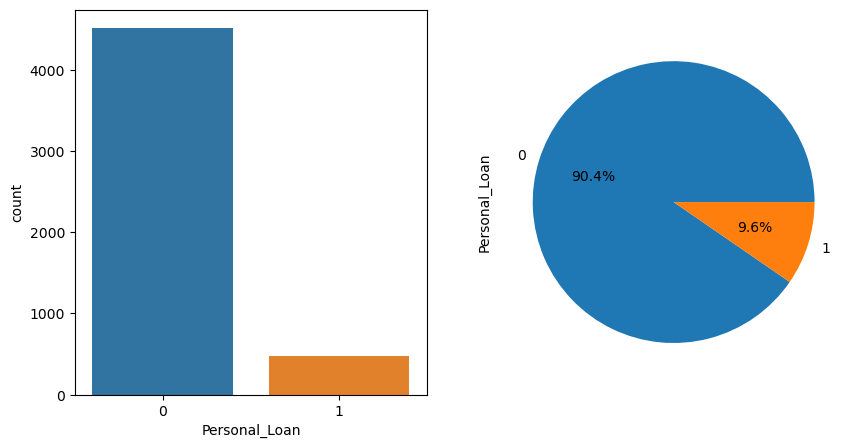

In [90]:
# Visualizing the imbalance:
fig, position = plt.subplots(1,2, figsize=(10,5), dpi=100)
plot = sns.countplot(x = 'Personal_Loan', data = bank_data, ax=position[0])
plot = y.value_counts().plot.pie(autopct="%1.1f%%", ax=position[1]) 

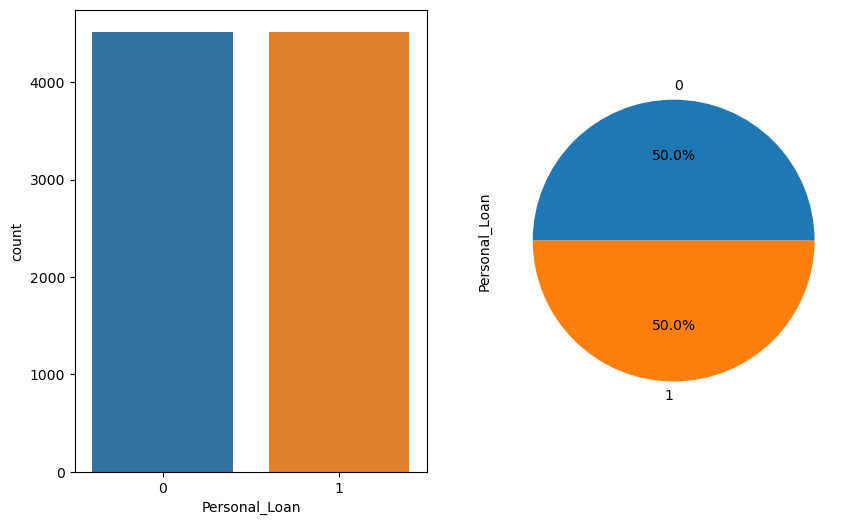

In [92]:
# Solving imbalance using SMOTE:
smote = SMOTE(random_state=42)
X_new,y_new = smote.fit_resample(X,y)

loan_balanced_df = pd.concat([X_new,y_new], axis = 1) # creating a dataframe for the balanced dat
fig, position = plt.subplots(1,2,figsize=(10,6))
plot = sns.countplot(x='Personal_Loan',data=loan_balanced_df, ax=position[0])
plot = loan_balanced_df['Personal_Loan'].value_counts().plot.pie(autopct="%1.1f%%", ax=position[1])

In [93]:
from collections import Counter

Counter(y_new)

Counter({0: 4520, 1: 4520})

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,stratify=y_new, test_size=0.2, random_state=42)

#### Finding optimum models for data:

In [97]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier()

scores, prediction = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:25<00:00,  1.14it/s]


In [98]:
scores

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,0.99,0.99,0.32
XGBClassifier,0.98,0.98,0.98,0.98,0.73
RandomForestClassifier,0.98,0.98,0.98,0.98,1.24
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.88
BaggingClassifier,0.98,0.98,0.98,0.98,0.26
DecisionTreeClassifier,0.98,0.98,0.98,0.98,0.05
LabelPropagation,0.96,0.96,0.96,0.96,3.28
LabelSpreading,0.96,0.96,0.96,0.96,4.37
KNeighborsClassifier,0.96,0.96,0.96,0.96,0.34


In [99]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [168]:
# Creating instances of the models:

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()
rnd_forest = RandomForestClassifier()
lgb = LGBMClassifier(max_depth=5)
xgb = XGBClassifier(max_depth=4)
gb = GradientBoostingClassifier()

In [102]:
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)

### Logistic Regression:

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3616
           1       0.87      0.89      0.88      3616

    accuracy                           0.88      7232
   macro avg       0.88      0.88      0.88      7232
weighted avg       0.88      0.88      0.88      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       904
           1       0.87      0.90      0.89       904

    accuracy                           0.88      1808
   macro avg       0.88      0.88      0.88      1808
weighted avg       0.88      0.88      0.88      1808



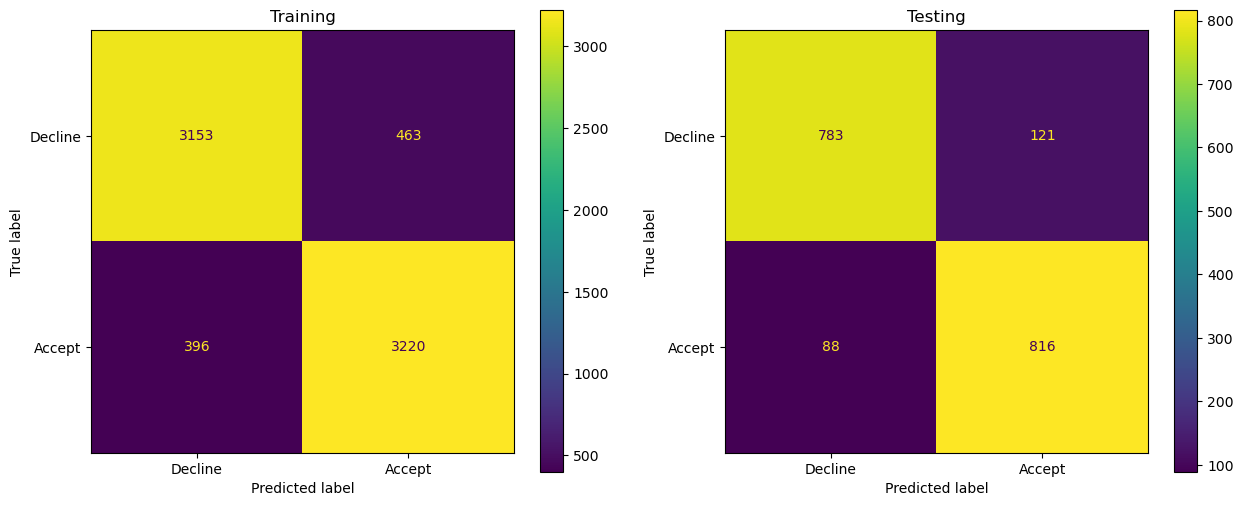

,Precision,Recall,F1 Score,Accuracy
Training,0.87,0.89,0.88,0.88
Testing,0.87,0.90,0.89,0.88


In [126]:
#Training Prediction:
prediction_train = building_model(model=log_reg,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=log_reg,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Decline','Accept'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- Model generalizes well with a recall of 89% and 90% for both training and testing.
- From the testing, 10% (88 customers) were miss classified to decline the loan, whereas they accepted the loan.

#### Model performance evaluation and improvement

- Recall is the most important metric for evaluation because it explains how well the model performs in predicting the number of customers that will accept the loan offer compared to the actual number of those who did accept the loan.
- For example, in the test data, it correctly predicts just 90% (816 customers) will accept the loan offer although it miss classifies 88 customers to decline offer.
- Since the goal of the model is to know if a customer will accept, the recall can best determine the model performance because it compares result against the actual values from the main data.

The model can be imporved

In [150]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

log = LogisticRegression(random_state=0)

# set the parameters to tune
param_grid = {'penalty' : ['l1', 'l2'],
             'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag']}

# instantiate the models and grid search
grid = GridSearchCV(log, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag']},
             scoring='recall')

In [151]:
best_params = grid.best_params_
best_params

{'penalty': 'l2', 'solver': 'sag'}

In [152]:
grid.best_score_

0.9253306893468742

In [153]:
log_CV = LogisticRegression(**best_params, random_state=0)

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      3616
           1       0.82      0.93      0.87      3616

    accuracy                           0.86      7232
   macro avg       0.87      0.86      0.86      7232
weighted avg       0.87      0.86      0.86      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       904
           1       0.81      0.91      0.86       904

    accuracy                           0.85      1808
   macro avg       0.85      0.85      0.85      1808
weighted avg       0.85      0.85      0.85      1808



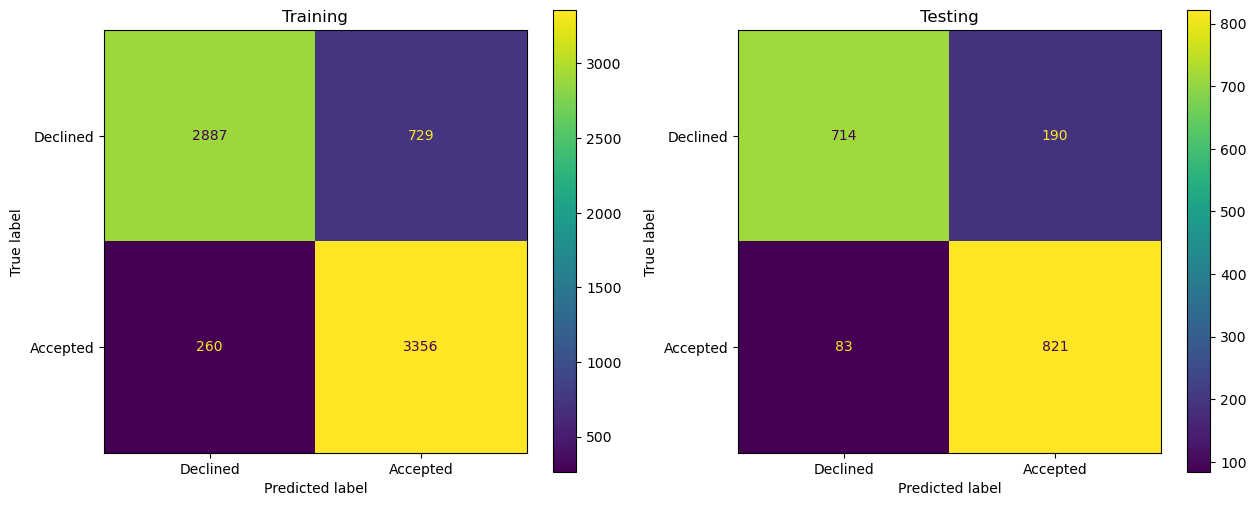

,Precision,Recall,F1 Score,Accuracy
Training,0.82,0.93,0.87,0.86
Testing,0.81,0.91,0.86,0.85


In [154]:
#Training Prediction:
prediction_train = building_model(model=log_CV,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=log_CV,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- The model still generalizes well with an improved recall of 91% in testing compared to the value before GridSearchCV.
- This was a result of setting the scoring to "recall" during GridSearchCV process.

### Decision Tree:

Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00      3616

    accuracy                           1.00      7232
   macro avg       1.00      1.00      1.00      7232
weighted avg       1.00      1.00      1.00      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.98      0.98      0.98       904

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808



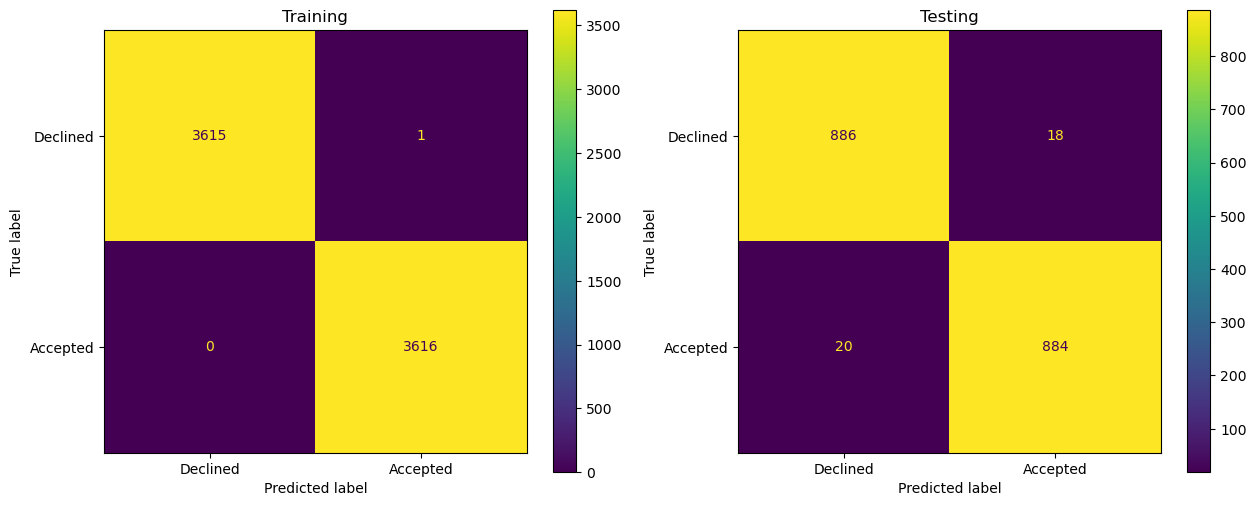

,Precision,Recall,F1 Score,Accuracy
Training,1.00,1.00,1.00,1.00
Testing,0.98,0.98,0.98,0.98


In [155]:
#Training Prediction:
prediction_train = building_model(model=dec_tree,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=dec_tree,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- Model overfits because it performed better in training than testing (major setback of Tree based models).

### Tuning the max_depth to 7:

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3616
           1       0.98      0.98      0.98      3616

    accuracy                           0.98      7232
   macro avg       0.98      0.98      0.98      7232
weighted avg       0.98      0.98      0.98      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       904
           1       0.96      0.97      0.96       904

    accuracy                           0.96      1808
   macro avg       0.96      0.96      0.96      1808
weighted avg       0.96      0.96      0.96      1808



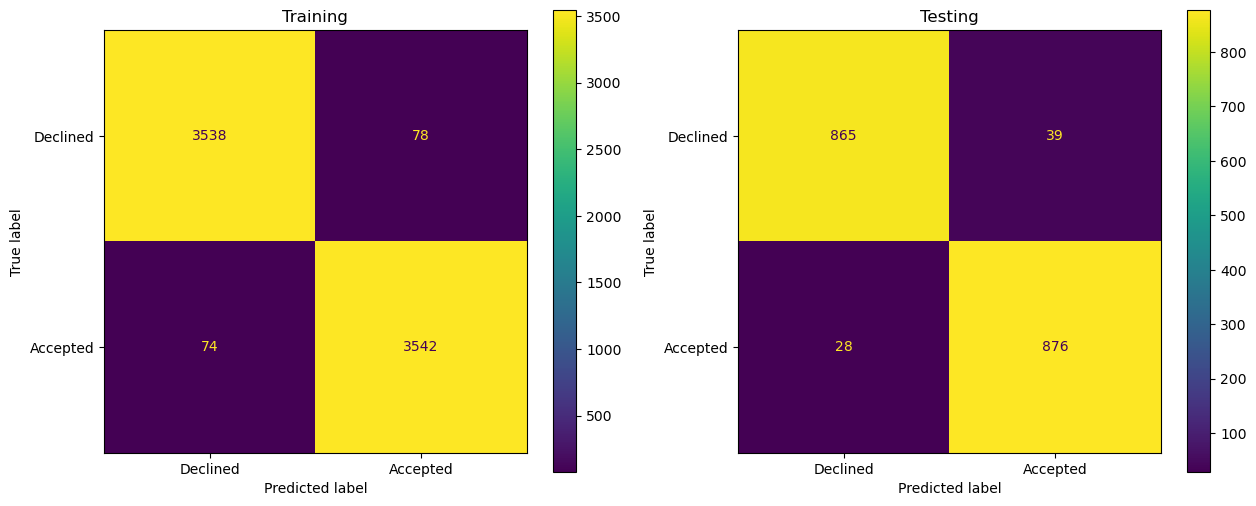

,Precision,Recall,F1 Score,Accuracy
Training,0.98,0.98,0.98,0.98
Testing,0.96,0.97,0.96,0.96


In [157]:
dec_tree_2 = DecisionTreeClassifier(max_depth=7)

#Training Prediction:
prediction_train = building_model(model=dec_tree_2,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=dec_tree_2,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- Model now generalizes well and performs well on both training and testing.

### Hyperparameter Tuning with GridSearchCV:

In [160]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dec = DecisionTreeClassifier(random_state=0)

# set the parameters to tune
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],
             'max_depth':range(3,9)}

# instantiate the models and grid search
grid = GridSearchCV(dec, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(3, 9)},
             scoring='recall')

In [161]:
best_params = grid.best_params_
best_params

{'criterion': 'gini', 'max_depth': 8}

In [ ]:
grid.best_score_

In [162]:
dec_CV = DecisionTreeClassifier(**best_params, random_state=0)

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3616
           1       0.99      0.98      0.98      3616

    accuracy                           0.98      7232
   macro avg       0.98      0.98      0.98      7232
weighted avg       0.98      0.98      0.98      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       904
           1       0.97      0.97      0.97       904

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808



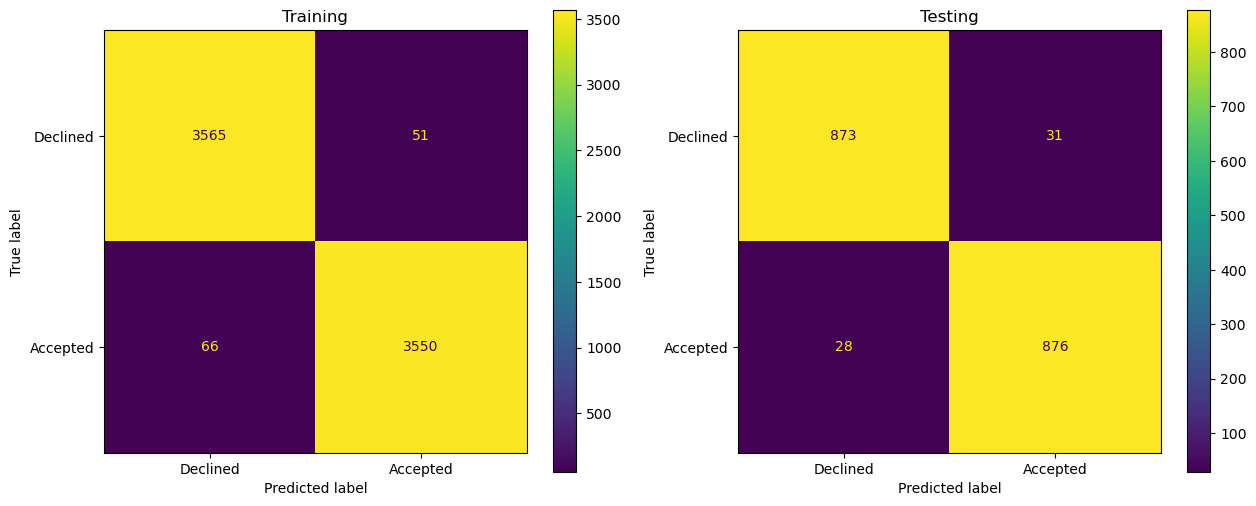

,Precision,Recall,F1 Score,Accuracy
Training,0.99,0.98,0.98,0.98
Testing,0.97,0.97,0.97,0.97


In [163]:
#Training Prediction:
prediction_train = building_model(model=dec_CV,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=dec_CV,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- No obvious change in the recall value, though slight increase in the precision and f1 score.

### Random Forest:

Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3616
           1       1.00      1.00      1.00      3616

    accuracy                           1.00      7232
   macro avg       1.00      1.00      1.00      7232
weighted avg       1.00      1.00      1.00      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       904
           1       0.98      0.99      0.98       904

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808



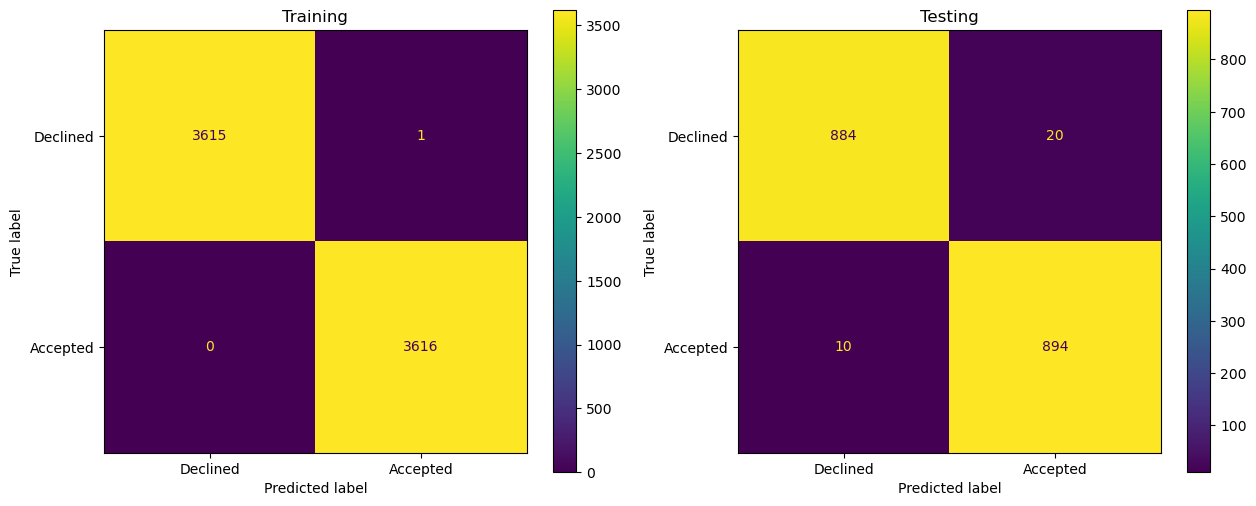

,Precision,Recall,F1 Score,Accuracy
Training,1.00,1.00,1.00,1.00
Testing,0.98,0.99,0.98,0.98


In [167]:
#Training Prediction:
prediction_train = building_model(model=rnd_forest,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=rnd_forest,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- Model overfits with good performance in traininng but not so good performance on testing.

#### Attempting Hyperparameter tuning (max_depth=8):


In [165]:
rand = RandomForestClassifier(max_depth=8)

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3616
           1       0.98      0.98      0.98      3616

    accuracy                           0.98      7232
   macro avg       0.98      0.98      0.98      7232
weighted avg       0.98      0.98      0.98      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       904
           1       0.97      0.98      0.97       904

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808



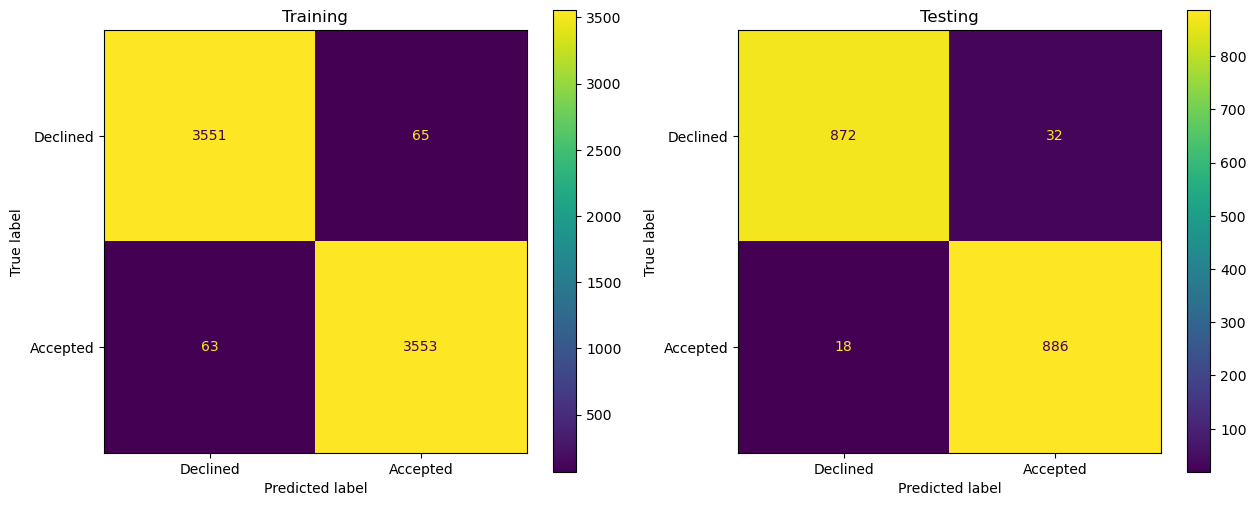

,Precision,Recall,F1 Score,Accuracy
Training,0.98,0.98,0.98,0.98
Testing,0.97,0.98,0.97,0.97


In [166]:
#Training Prediction:
prediction_train = building_model(model=rand,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=rand,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- Model now generalizing well and perfoms better on both training and testing sets of data.

### Gradient Boosting:

Classification Report for Training:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3616
           1       0.98      0.98      0.98      3616

    accuracy                           0.98      7232
   macro avg       0.98      0.98      0.98      7232
weighted avg       0.98      0.98      0.98      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       904
           1       0.96      0.98      0.97       904

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808



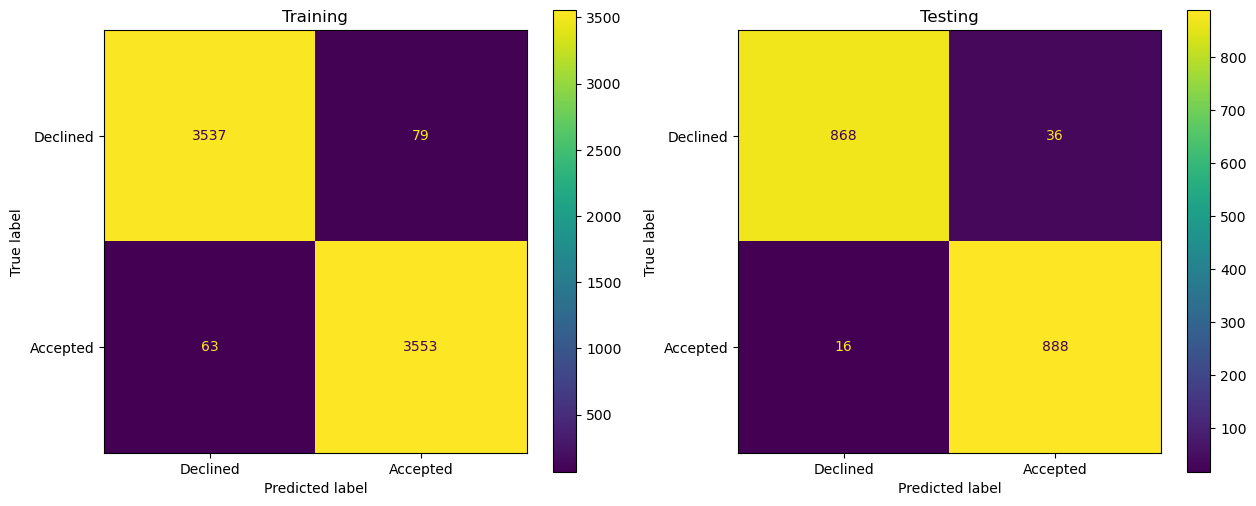

,Precision,Recall,F1 Score,Accuracy
Training,0.98,0.98,0.98,0.98
Testing,0.96,0.98,0.97,0.97


In [169]:
#Training Prediction:
prediction_train = building_model(model=gb,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=gb,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

### Hyperparameter Tuning with GridSearchCV:

In [254]:
gb2 = GradientBoostingClassifier(random_state=0)

# set the parameters to tune
param_grid = {'learning_rate': [0.01, 0.1, 1, 1.2, 1.5],
             'max_depth': range(2,8),
             'criterion':['friedman_mse', 'squared_error']}

# instantiate the models and grid search
grid = GridSearchCV(gb2, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 1, 1.2, 1.5],
                         'max_depth': range(2, 8)},
             scoring='recall')

In [255]:
grid.best_score_

0.998064005868733

In [256]:
best_params = grid.best_params_
best_params

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 2}

In [257]:
gb_CV = GradientBoostingClassifier(**best_params, random_state=0)

Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      3616
           1       0.83      1.00      0.91      3616

    accuracy                           0.90      7232
   macro avg       0.91      0.90      0.90      7232
weighted avg       0.91      0.90      0.90      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       904
           1       0.82      1.00      0.90       904

    accuracy                           0.89      1808
   macro avg       0.91      0.89      0.89      1808
weighted avg       0.91      0.89      0.89      1808



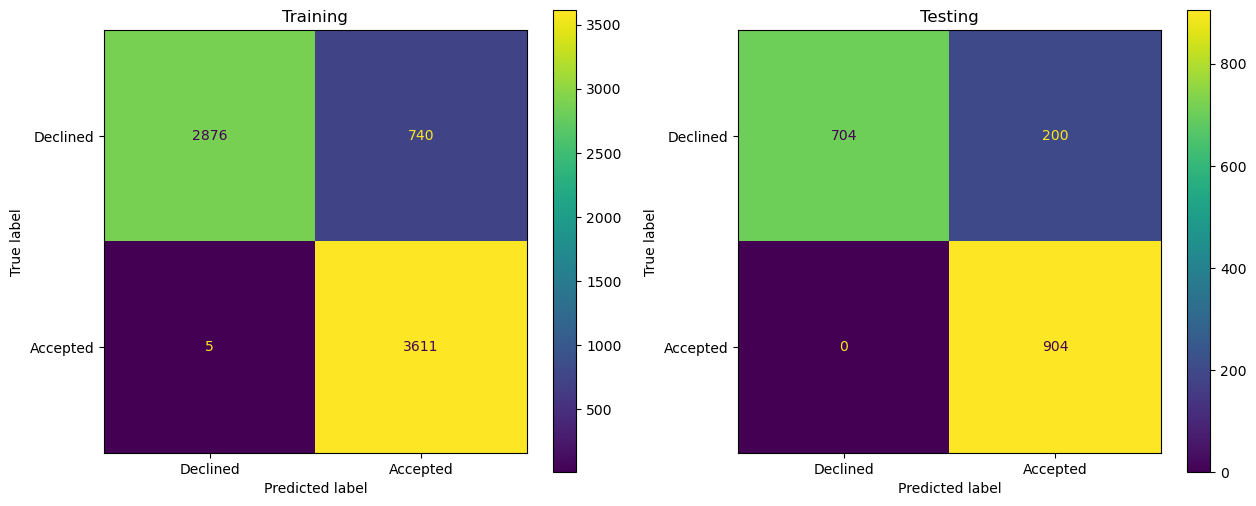

,Precision,Recall,F1 Score,Accuracy
Training,0.83,1.00,0.91,0.90
Testing,0.82,1.00,0.90,0.89


In [258]:
#Training Prediction:
prediction_train = building_model(model=gb_CV,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=gb_CV,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- Model still performed well for both training and testing, with high recall values of 100%.
- Model can effectively be deployed to predict whether a customer will accept the loan.

### Dimentionality Reduction with RFE:

In [270]:
#Creating an instance of the model:
model = GradientBoostingClassifier(**best_params, random_state=0)
r_feature_elim = RFE(model, n_features_to_select=5)

#Training the model
r_model = r_feature_elim.fit(X_new,y_new)

#Outputing booleans to identify features:
print(r_model.support_)

[ True  True False False  True  True  True]


In [271]:
#Outputting the best n features (All feature corrsponding to the 'True' from r_model.support_):
X_select = np.array(X_new.columns)[r_model.support_]
print(X_select)

['Income' 'CCAvg' 'Family' 'Education' 'Securities_Account']


In [272]:
#Separating the dependent and independent variables:
X = X_new[X_select]  #Using the selected variables from RFE method
y = y_new

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

stan = StandardScaler()
X_train_sd = stan.fit_transform(X_train)
X_test_sd = stan.transform(X_test)

Classification Report for Training:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      3616
           1       0.83      1.00      0.91      3616

    accuracy                           0.90      7232
   macro avg       0.91      0.90      0.90      7232
weighted avg       0.91      0.90      0.90      7232

Classification Report for Testing:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       904
           1       0.82      1.00      0.90       904

    accuracy                           0.89      1808
   macro avg       0.91      0.89      0.89      1808
weighted avg       0.91      0.89      0.89      1808



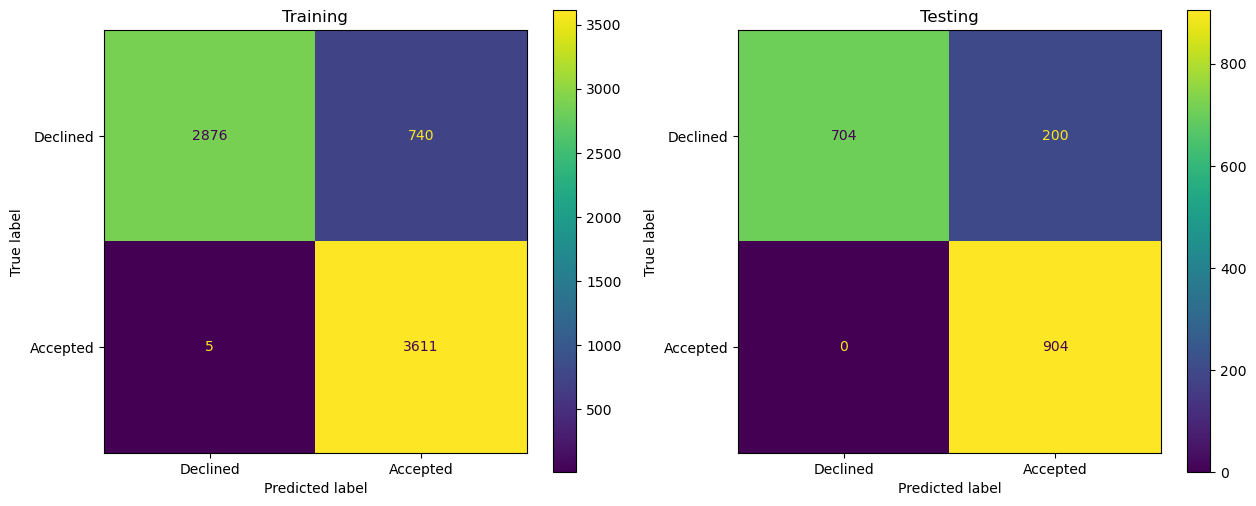

,Precision,Recall,F1 Score,Accuracy
Training,0.83,1.00,0.91,0.90
Testing,0.82,1.00,0.90,0.89


In [273]:
#Training Prediction:
prediction_train = building_model(model=gb_CV,Xtrain_data=X_train,X_data=X_train,Ytrain_data=y_train)

#Testing Prediction:
prediction_test = building_model(model=gb_CV,Xtrain_data=X_train,X_data=X_test,Ytrain_data=y_train)

#Confusion Matrix for both Training and Testing:
classification_confusion_matrix(fig=(15,6),yTest=y_test,yTrain=y_train,yPrediction_train=prediction_train,
                                yPrediction_test=prediction_test,target_labels=['Declined','Accepted'])

#Performance Metric Evaluation:
performance_evaluation(prediction_test=prediction_test,prediction_train=prediction_train,Ytest_data=y_test,Ytrain_data=y_train)

- Using only 5 features gave the same results as with the 7 features previously selected.
- For dimemsionality reduction, these 5 features ('Income', 'CCAvg', 'Family', 'Education' & 'Securities_Account' performed best in predicting the customers who will accept a loan.
- Model can be deployed because it fully satifies the objective of the bank and is less costly to apply due to it's smaller dimension.

### Further Recommendations:

In [278]:
bank_data_raw.groupby('Personal_Loan')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.00,66.12,40.20,8.00,35.00,59.00,84.00,186.50
1,480.00,144.25,30.86,60.00,122.00,142.50,172.00,186.50


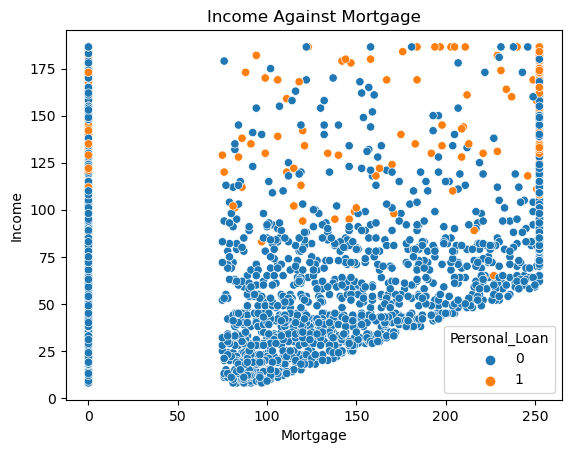

In [279]:
sns.scatterplot(data=bank_data_raw, x='Mortgage', y='Income', hue='Personal_Loan')
plt.title('Income Against Mortgage')
plt.show()

- From the analysis shown above, it is clear that most of the customers who accepted the loan are high earners above 100,000 dollars.
- Hence, the bank should focus more on high income earners above $100,000, especially the few who earn higher than this amount but didn't accept the loan.